<a href="https://colab.research.google.com/github/Toribega/UAM/blob/main/results/%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D(%EB%B3%80%EC%88%98%20%ED%86%B5%ED%95%A9%ED%95%9C%20%EA%B2%BD%EC%9A%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('/content/설문조사결과 Raw Data-1 (1).csv', encoding='cp949')

# 변수명 수정
df.rename(columns={'1.1	나는 여행을 통해 일상에서 잠시 휴식을 취하고 싶은 욕구를 자주 느낀다': '관광동기1',
                   '1.2	고급 숙박 시설, 고급 식사, 특별한 경험의 매력이 여행 선택에 중요한 부분이다': '관광동기2',
                   '1.3	여행을 하면서 새롭고 다양한 경험을 찾는 것에 관심이 있다': '관광동기3',
                   '1.4	변화에 대한 열망과 활력이 여행 결정에 영향을 미친다': '관광동기4',
                   '1.5	여행 중에 자연과 연결되는 것이 얼마나 중요합니까?': '관광동기5',
                   '3.1	관광지 간 이동은 여행의 중요한 부분이다': '관광지_이동수단1',
                   '3.2	관광지 간 이동수단의 편리성은 여행 만족도에 영향이 크다': '관광지_이동수단2',
                   '1.1	UAM이 나에게 유용할 것이다': '유용성',
                   '2.1	나는 흥미와 즐거움을 느끼기 위해 UAM을 사용할 것이다': '사용의도1',
                   '2.2	나는 호기심이 많아 UAM을 사용해보고 싶다': '사용의도2',
                   '4.3	나는 UAM이 무엇인지 알고 있다': '사용의도3',
                   '4.4	나는 UAM에 대해서 관심이 많다': '사용의도4',
                   '5.1	나는 혁신적인 새로운 기술에 대해서 관심이 많다': '수용태도',
                   '1. UAM 이용 금액이 1km X 3000원이라고 할때 UAM을 탑승할 의향이 있으십니까?': '이용금액3000',
                   '2. UAM 이용 금액이 1km X 2000원이라고 할때 UAM을 탑승할 의향이 있으십니까?': '이용금액2000',
                   '3. UAM 이용 금액이 1km X 1300원이라고 할때 UAM을 탑승할 의향이 있으십니까?': '이용금액1300',
                   '7.1	운송 옵션을 선택할 때 환경 지속 가능성은 중요하다': '환경친화성'}, inplace=True)

df['사용의도'] = df['사용의도1'] + df['사용의도2'] + df['사용의도3'] + df['사용의도4']
df['관광동기'] = df['관광동기1'] + df['관광동기2'] + df['관광동기3'] + df['관광동기4'] + df['관광동기5']
df['관광지_이동수단_편리성&중요성'] = df['관광지_이동수단1'] + df['관광지_이동수단2']


# 분석하고 싶은 변수 선택
selected_columns = ['관광동기', '관광지_이동수단_편리성&중요성',
                    '유용성', '사용의도',
                    '수용태도', '이용금액3000', '이용금액2000', '이용금액1300', '환경친화성']

# 선택한 변수들로 상관관계 분석 수행
correlation_matrix = df[selected_columns].corr()


In [4]:

# 상관관계 결과를 데이터프레임으로 변환
correlation_matrix_df = pd.DataFrame(correlation_matrix)

# 결과 출력
pd.DataFrame(correlation_matrix_df)

,관광동기,관광지_이동수단_편리성&중요성,유용성,사용의도,수용태도,이용금액3000,이용금액2000,이용금액1300,환경친화성
관광동기,1.000000,0.345955,0.368446,0.490729,0.435953,-0.076233,-0.128609,-0.212294,0.308851
관광지_이동수단_편리성&중요성,0.345955,1.000000,0.210618,0.193963,0.188241,-0.023848,-0.035057,-0.054142,0.261891
유용성,0.368446,0.210618,1.000000,0.692354,0.493062,-0.089040,-0.197680,-0.276900,0.274065
사용의도,0.490729,0.193963,0.692354,1.000000,0.666436,-0.155818,-0.251486,-0.352345,0.343069
수용태도,0.435953,0.188241,0.493062,0.666436,1.000000,-0.149472,-0.212712,-0.271866,0.281231
이용금액3000,-0.076233,-0.023848,-0.089040,-0.155818,-0.149472,1.000000,0.467951,0.165766,-0.058665
이용금액2000,-0.128609,-0.035057,-0.197680,-0.251486,-0.212712,0.467951,1.000000,0.324304,-0.078512
이용금액1300,-0.212294,-0.054142,-0.276900,-0.352345,-0.271866,0.165766,0.324304,1.000000,-0.155921
환경친화성,0.308851,0.261891,0.274065,0.343069,0.281231,-0.058665,-0.078512,-0.155921,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


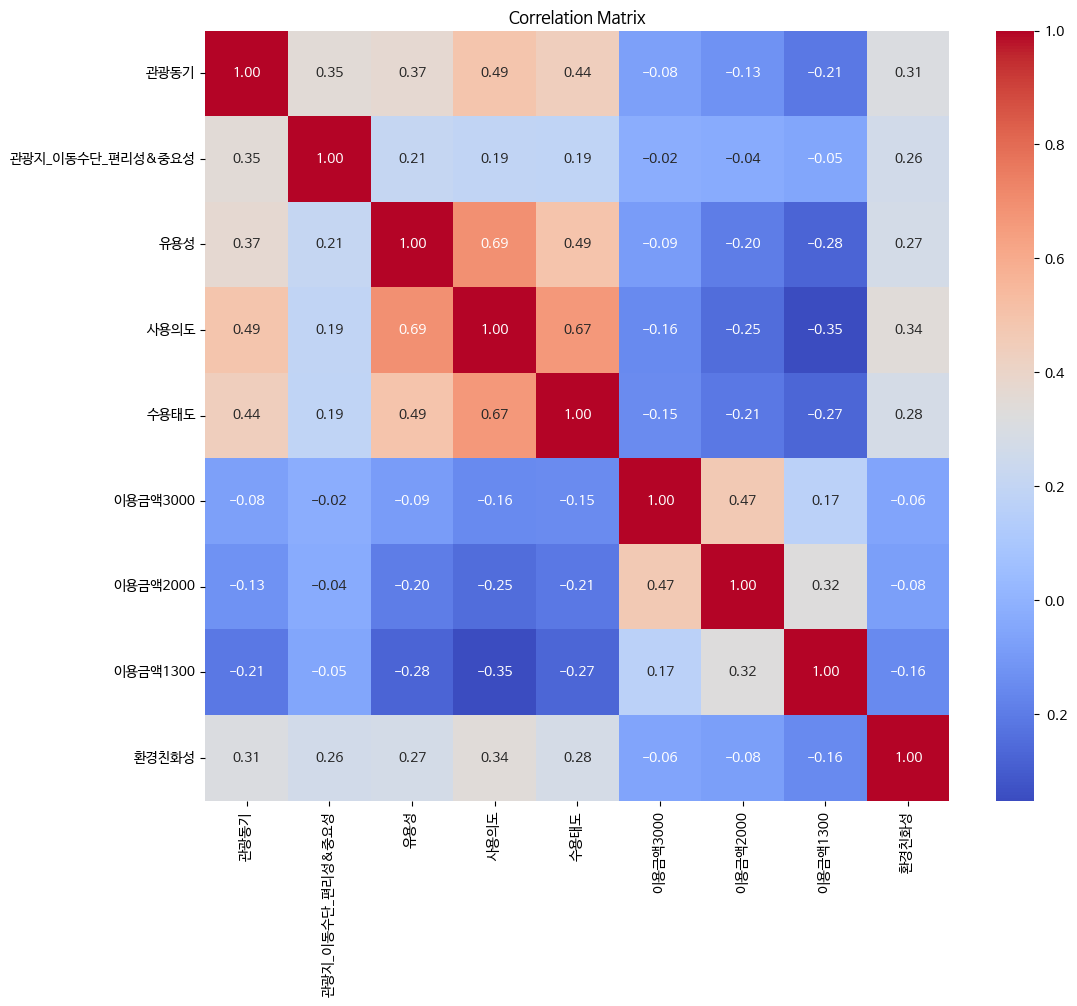

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 상관관계 행렬 생성
correlation_matrix = df[selected_columns].corr()

# heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


